In [1]:
###### TellCo #######

'''
TellCo, an existing mobile service provider in the Republic of Pefkakia.

The Data set is **month** of **aggregated data** on **xDR**. 

The Goal of this project is to Give insight Wether To buy or 
Leave the Mobile Service Provider
'''


'\nTellCo, an existing mobile service provider in the Republic of Pefkakia.\n\nThe Data set is **month** of **aggregated data** on **xDR**. \n\nThe Goal of this project is to Give insight Wether To buy or \nLeave the Mobile Service Provider\n'

In [2]:
# Modules
import pandas as pd
pd.set_option('max_column', None)

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [81]:
# Read File
file_name = 'Week1_challenge_data_source.csv'
row_file = pd.read_csv(f'../data/{file_name}', na_values=['?','Na','NaN', 'undefined', None])

## Data Overview And Cleaning


### Sample view of dataset

In [82]:
df = row_file # Need this for future use
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,845,000,704.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9164566995485190,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,879,000,576.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,081,000,448.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,443,000,320.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"3,330.00","37,882.00","1,321,509,685.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,999,936.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","1

In [69]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [83]:
print(f'Data Frame Contains {df.shape[0]} rows and {df.shape[1]} columns')

Data Frame Contains 150001 rows and 55 columns


### How much of the data is Null ? 

In [84]:
def null_percentage(df):
    number_of_rows, number_of_columns = df.shape
    df_size = number_of_rows * number_of_columns
    
    null_size = (df.isnull().sum()).sum()
    percentage = round((null_size / df_size) * 100, 2)
    print(f"Data Fraame contain null values of { percentage }%")

null_percentage(df)

Data Fraame contain null values of 12.72%


### Dataset Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

#### Columns Null Values

In [8]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### Data Cleaning

**I plan to drop rows with Null 'Bearer Id' and 'MSISDN/Number' thinkig they were unique But that is not the case**

In [85]:
df['Bearer Id'].value_counts()
df['MSISDN/Number'].value_counts()
df.dropna(subset=['Bearer Id', 'MSISDN/Number'], inplace=True)

In [10]:
df.isnull().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                             160
Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)                  712
DL TP > 1 Mbps (%)             

#### Drop columns with more than 30% null Values

In [96]:
def drop_column_with_many_null(df):
    df_size = df.shape[0]
    
    columns_list = df.columns
    bad_columns = []
    
    for column in columns_list:
        null_per_column = df[column].isnull().sum()
        percentage = round( (null_per_column / df_size) * 100 , 2)
        
        if(percentage > 30):
            bad_columns.append(column)
    bad_columns.append('Dur. (ms).1')
    return bad_columns

bad_columns = drop_column_with_many_null(df)
print(bad_columns)
df_clean = df.drop(bad_columns, axis=1)

shape = df_clean.shape
print("Shape After Droping columns with more than 30% Null")
print(f"rows: {shape[0]}\tcolumns:{shape[1]}")

['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Dur. (ms).1']
Shape After Droping columns with more than 30% Null
rows: 148506	columns:44


In [72]:
df_clean.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other U

In [80]:
df_clean.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00"
mean,"10,146,757,650,164,744,192.00",499.21,498.64,"105,084.05","208,201,599,922,260.41","41,906,541,782.21","48,500,684,616,792.02",91.65,15.28,"13,287.52","1,770.60",92.90,3.04,1.71,1.60,98.54,0.77,0.15,0.08,"1,837,842.18","1,414,772.77","3,715.16","4,013.84","1,795,144.11","32,922.09","5,751,770.33","2,056,292.55","1,791,784.70","467,403.49","11,633,868.43","11,008,567.70","11,627,241.74","11,001,902.34","422,064,222.70","8,289,599.59","421,152,465.36","8,262,685.05","41,119,372.80","454,664,032.00"
std,"2,893,261,633,271,229,952.00",288.56,288.07,"81,072.74","15,243,472,825.67","2,450,975,846,357.30","22,432,166,298,203.47",530.51,76.63,"23,993.48","4,630.31",13.01,6.19,4.15,4.82,4.63,3.22,1.63,1.30,"5,717,904.09","4,661,843.93","9,184.02","10,170.79","1,035,470.11","19,008.99","3,308,754.95","1,189,939.11","1,035,955.74","269,981.91","6,711,236.45","6,345,625.17","6,724,993.74","6,357,929.85","244,004,290.26","4,781,966.86","243,163,937.39","4,768,806.07","11,278,441.20","244,179,073.24"
min,"6,917,537,518,543,500,288.00",0.00,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,"7,349,883,247,462,774,784.00",250.00,251.00,"58,248.75","208,201,401,264,008.00","33,651,311,444.25","35,460,708,962,514.00",28.00,3.00,43.00,47.00,91.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,"14,848.00","21,499.00",86.00,105.00,"899,044.50","16,431.00","2,883,392.75","1,023,967.00","892,620.75","233,445.00","5,833,290.25","5,515,832.00","5,778,898.50","5,476,773.75","210,476,489.00","4,130,680.00","210,304,184.50","4,144,178.75","33,218,278.00","243,126,304.25"
50%,"7,349,883,264,172,900,352.00",499.00,500.00,"86,399.00","208,201,546,332,650.50","33,663,708,556.00","35,722,309,017,450.00",38.00,5.00,63.00,62.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"39,018.50","46,481.00",199.00,213.00,"1,793,860.50","32,917.00","5,767,399.00","2,054,221.50","1,793,641.50","466,419.00","11,615,961.50","11,012,318.00","11,642,380.00","10,999,370.50","423,466,906.50","8,291,649.50","421,861,759.00","8,266,016.00","41,141,959.50","455,940,800.50"
75%,"13,042,425,978,973,999,104.00",749.00,749.00,"132,932.75","208,201,771,619,073.25","33,683,515,176.75","86,119,704,824,101.00",62.00,11.00,"19,699.50","1,116.00",100.00,4.00,1.00,0.00,100.00,0.00,0.00,0.00,"676,304.25","594,780.00","2,609.00","2,406.00","2,694,777.25","49,330.00","8,624,195.25","3,088,293.50","2,689,879.75","700,481.75","17,446,392.25","16,514,556.25","17,470,916.50","16,502,847.75","633,274,979.00","12,432,259.75","631,633

#### Fill Columns of Object with Mode

In [99]:
columns_object_type = ['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

for column in columns_object_type:
    mode = df_clean[column].mode()[0]
    df_clean[column] = df_clean[column].fillna(mode)

#### Fill Positive and Negative Skew columns with Median

#### Fill Columns with skew of ( 0 ) with Mean or Median

In [94]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148506 entries, 0 to 149999
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148346 non-null  object 
 10  Avg RTT DL (ms)                 120870 non-null  float64
 11  Avg RTT UL (ms)                 120890 non-null  float64
 12  Avg Bearer TP DL

In [98]:
## i could get away by filling them all with Median
for column in df_clean.columns:
    # if column have null value fill 
    if(df[column].isnull().sum() > 0):
        mode = df_clean[column].mode()[0]
        df_clean[column] = df_clean[column].fillna(mode)

In [14]:
df_clean.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [77]:
null_percentage(df_clean)

Data Fraame contain null values of 0.0%


In [79]:
### save the cleaned data
for_save_df = df_clean.set_index('Bearer Id')
for_save_df.to_csv('../data/clean_telco.csv')

In [16]:
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def format_float(value):
    return f'{value:,.2f}'

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


pd.options.display.float_format = format_float


### Fix outliers of each columns

In [17]:
# columns_object_type = ['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']
# for column in df_clean.columns:
#     if(column not in columns_object_type):
#         df_clean[column] = fix_outlier(df_clean, column)


Sub-Task
1. Start by identifying the top 10 handsets used by the customers.
2. Then, identify the top 3 handset manufacturers
3. Next, identify the top 5 handsets per top 3 handset manufacturer
4. Make a short interpretation and recommendation to marketing teams


In [18]:
top_10_handset = df_clean.groupby("Handset Type")['MSISDN/Number'].nunique().nlargest(10)
top_10_handset

Handset Type
Huawei B528S-23A                17266
Apple iPhone 6S (A1688)          6744
Apple iPhone 6 (A1586)           6245
Apple iPhone 7 (A1778)           4675
Apple iPhone Se (A1723)          3744
Apple iPhone 8 (A1905)           3535
Samsung Galaxy S8 (Sm-G950F)     3232
Apple iPhone Xr (A2105)          3067
Samsung Galaxy J5 (Sm-J530)      2741
Samsung Galaxy A5 Sm-A520F       2701
Name: MSISDN/Number, dtype: int64

In [19]:
top_3_manufacturers = df_clean.groupby("Handset Manufacturer")['MSISDN/Number'].nunique().nlargest(3)
top_3_manufacturers

Handset Manufacturer
Apple      49127
Samsung    30647
Huawei     21628
Name: MSISDN/Number, dtype: int64

In [20]:
manufacturers = df_clean.groupby("Handset Manufacturer")

apple_top_5 = manufacturers.get_group('Apple').groupby("Handset Type")['MSISDN/Number'].nunique().nlargest(5)
samsung_top_5 = manufacturers.get_group('Samsung').groupby("Handset Type")['MSISDN/Number'].nunique().nlargest(5)
huawei_top_5 = manufacturers.get_group('Huawei').groupby("Handset Type")['MSISDN/Number'].nunique().nlargest(5)


print("**** Apple ***")
print(apple_top_5)
print()
print("**** Samsung **")
print(samsung_top_5)
print()
print("*** Huawei ***")
print(huawei_top_5)

**** Apple ***
Handset Type
Apple iPhone 6S (A1688)    6744
Huawei B528S-23A           6650
Apple iPhone 6 (A1586)     6245
Apple iPhone 7 (A1778)     4675
Apple iPhone Se (A1723)    3744
Name: MSISDN/Number, dtype: int64

**** Samsung **
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3232
Samsung Galaxy J5 (Sm-J530)     2741
Samsung Galaxy A5 Sm-A520F      2701
Samsung Galaxy J3 (Sm-J330)     2582
Samsung Galaxy S7 (Sm-G930X)    2288
Name: MSISDN/Number, dtype: int64

*** Huawei ***
Handset Type
Huawei B528S-23A                  10616
Huawei P20 Lite Huawei Nova 3E     1526
Huawei E5180                       1182
Huawei P20                         1105
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64


## Begin Analysis 

### Task 1.1

Aggregate per user the following information in the column  
1. number of xDR sessions
2. Session duration
3. the total download (DL) and upload (UL) data
4. the total data volume (in Bytes) during this session for each application


In [21]:
aggrigate = {"Bearer Id": 'count', 'Dur. (ms)':'sum', 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum'}
aggrigation_result = df_clean.groupby('MSISDN/Number').agg(aggrigate)
aggrigation_result.describe()

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
count,"106,471.00","106,471.00","106,471.00","106,471.00"
mean,1.39,"146,571.49","57,353,397.42","634,166,456.00"
std,0.81,"186,562.67","35,696,601.18","464,985,545.89"
min,1.00,"7,142.00","2,866,892.00","8,827,082.00"
25%,1.00,"72,399.50","36,401,961.50","314,987,403.00"
50%,1.00,"103,137.00","46,813,124.00","570,732,060.00"
75%,2.00,"172,799.00","65,859,856.50","807,826,533.00"
max,18.00,"18,553,754.00","729,577,380.00","8,156,743,493.00"


#### User beheviour ON Applications

In [22]:
# determind from this variables 
# Social Media, Google, Email, Youtube, Netflix, Gaming, Other . 
aggrigate = {
    'Total Social Media':'sum',
    'Total Google': 'sum', 
    'Total Youtube': 'sum', 
    'Total Netflix':'sum',
    'Total Gaming':'sum',
    'Total Other':'sum',
    'Total Email': 'sum',
    'Total':'sum'
}
user_app_usage = df_clean.copy()

user_app_usage["Total Google"]    = user_app_usage["Google DL (Bytes)"] + user_app_usage["Google UL (Bytes)"]
user_app_usage["Total Youtube"]   = user_app_usage["Youtube DL (Bytes)"] + user_app_usage["Youtube UL (Bytes)"]
user_app_usage["Total Netflix"]   = user_app_usage["Netflix DL (Bytes)"] + user_app_usage["Netflix UL (Bytes)"]
user_app_usage["Total Email"]     = user_app_usage["Email DL (Bytes)"] + user_app_usage["Email UL (Bytes)"]
user_app_usage["Total Gaming"]    = user_app_usage["Gaming DL (Bytes)"] + user_app_usage["Gaming UL (Bytes)"]
user_app_usage["Total Social Media"] = user_app_usage["Social Media DL (Bytes)"] + user_app_usage["Social Media UL (Bytes)"]
user_app_usage["Total Other"]     = user_app_usage["Other DL (Bytes)"] + user_app_usage["Other UL (Bytes)"]
user_app_usage["Total Email"]     = user_app_usage["Email UL (Bytes)"] + user_app_usage["Email DL (Bytes)"]
user_app_usage['Total']           = user_app_usage['Total UL (Bytes)'] + user_app_usage['Total DL (Bytes)']

user_behaviour = user_app_usage.groupby('MSISDN/Number').agg(aggrigate)
user_behaviour.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 106471 entries, 33601001722.0 to 882397108489451.0
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Total Social Media  106471 non-null  float64
 1   Total Google        106471 non-null  float64
 2   Total Youtube       106471 non-null  float64
 3   Total Netflix       106471 non-null  float64
 4   Total Gaming        106471 non-null  float64
 5   Total Other         106471 non-null  float64
 6   Total Email         106471 non-null  float64
 7   Total               106471 non-null  float64
dtypes: float64(8)
memory usage: 7.3 MB


In [23]:
columns = ['Total Social Media','Total Google','Total Youtube','Total Netflix','Total Gaming', 'Total Other','Total Email','Total' ]
user_behaviour = fix_outlier(user_behaviour, columns)


## Graphical Analysis

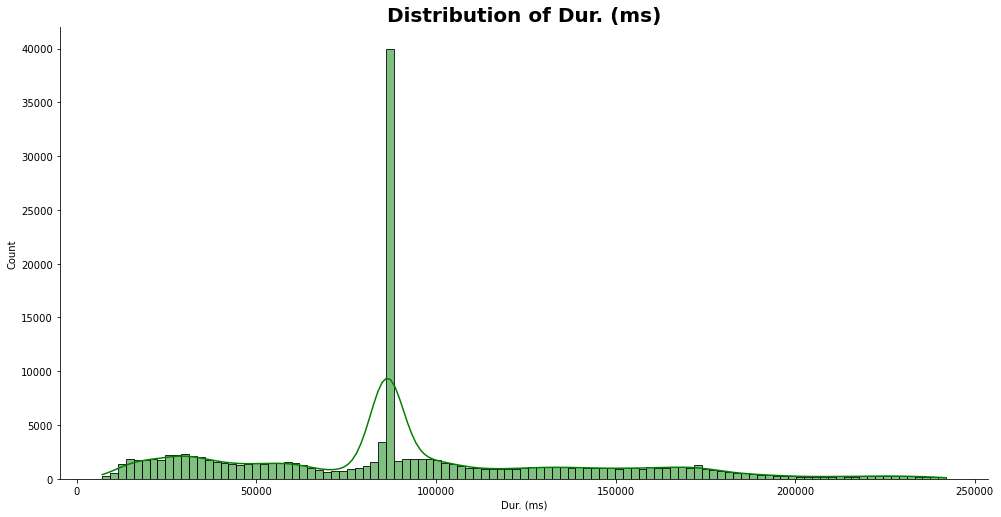

In [24]:
df_clean['Dur. (ms)'] = fix_outlier(df_clean, ['Dur. (ms)'])
plot_hist(df_clean, 'Dur. (ms)','green')

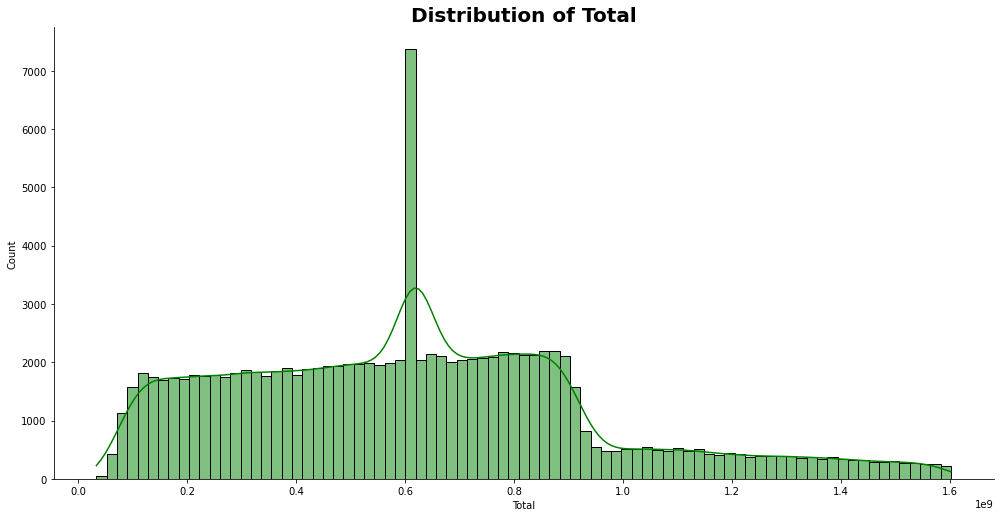

In [25]:
plot_hist(user_behaviour, 'Total','green')

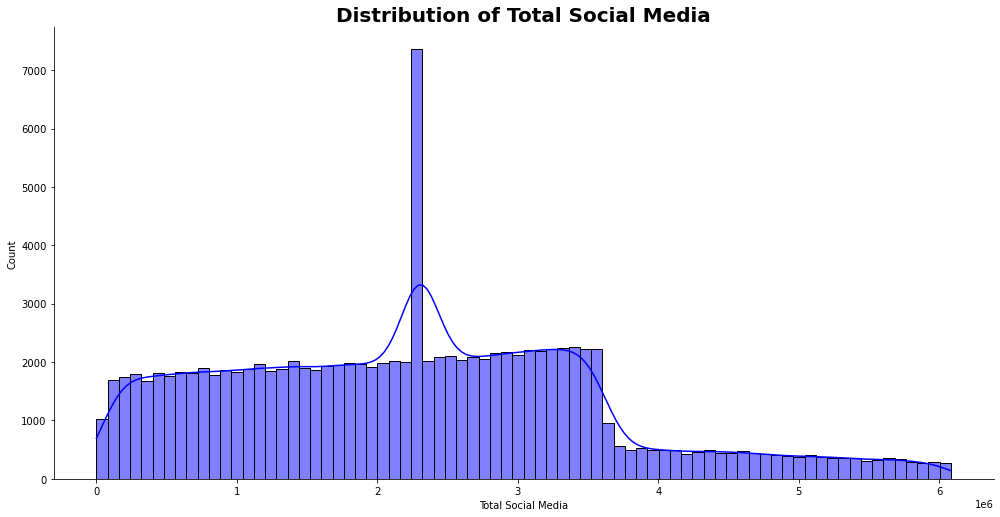

In [26]:
plot_hist(user_behaviour, 'Total Social Media','blue')

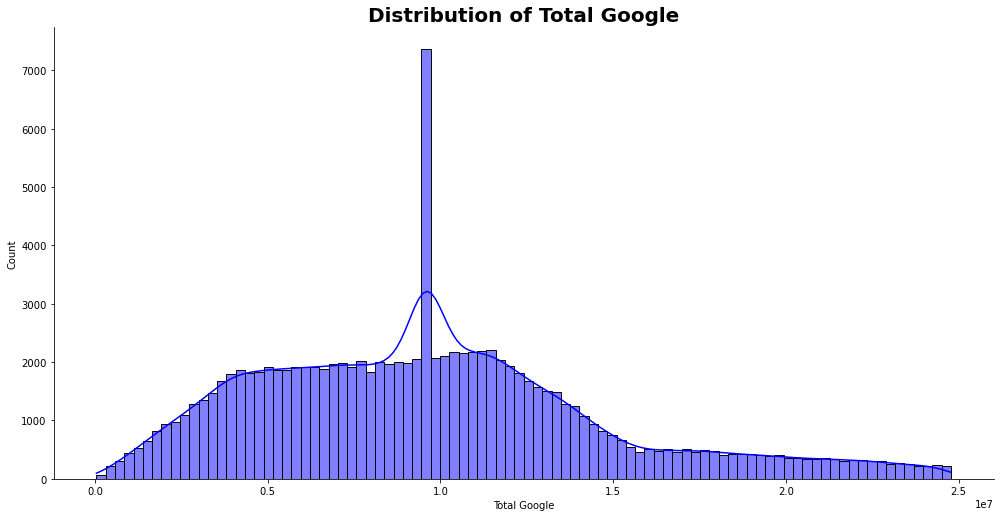

In [27]:
plot_hist(user_behaviour, 'Total Google','blue')

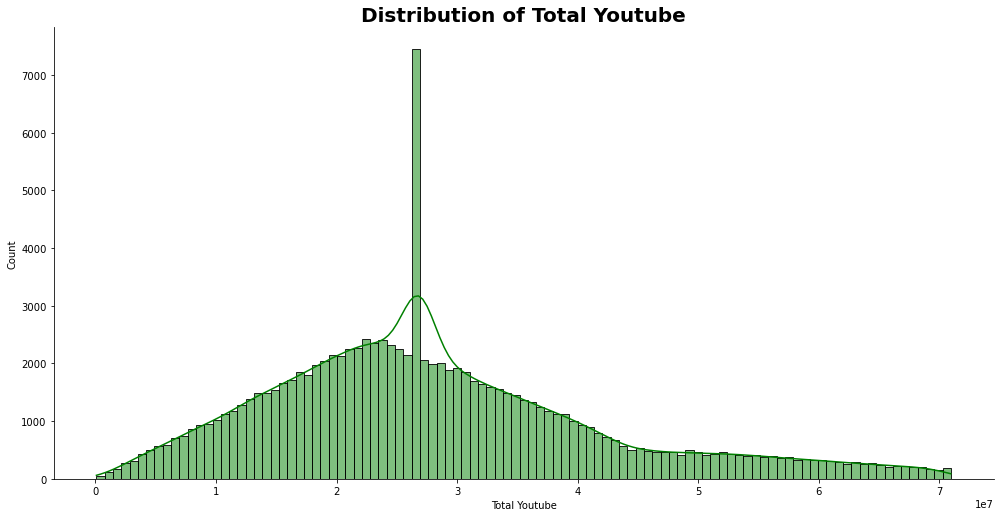

In [28]:
plot_hist(user_behaviour, 'Total Youtube','green')

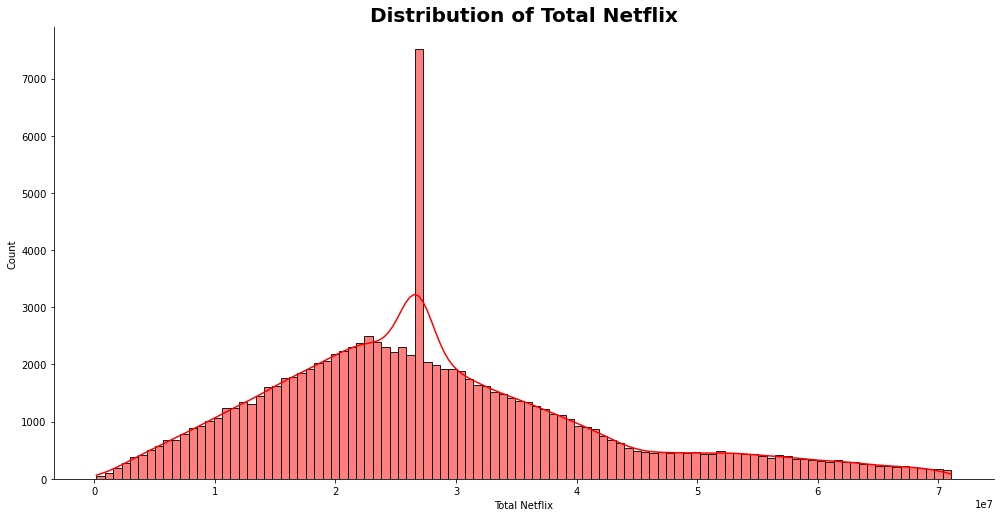

In [29]:
plot_hist(user_behaviour, 'Total Netflix','red')

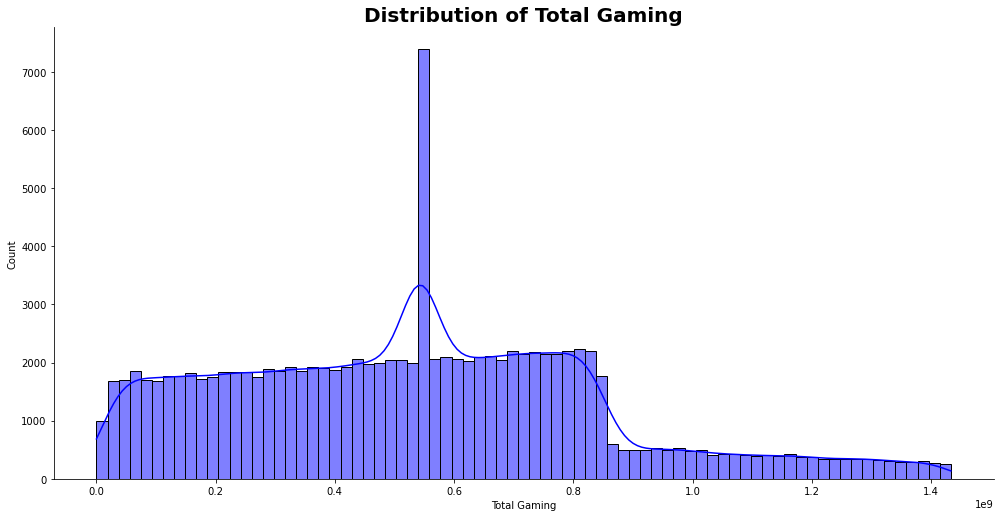

In [30]:
plot_hist(user_behaviour, 'Total Gaming', 'blue')

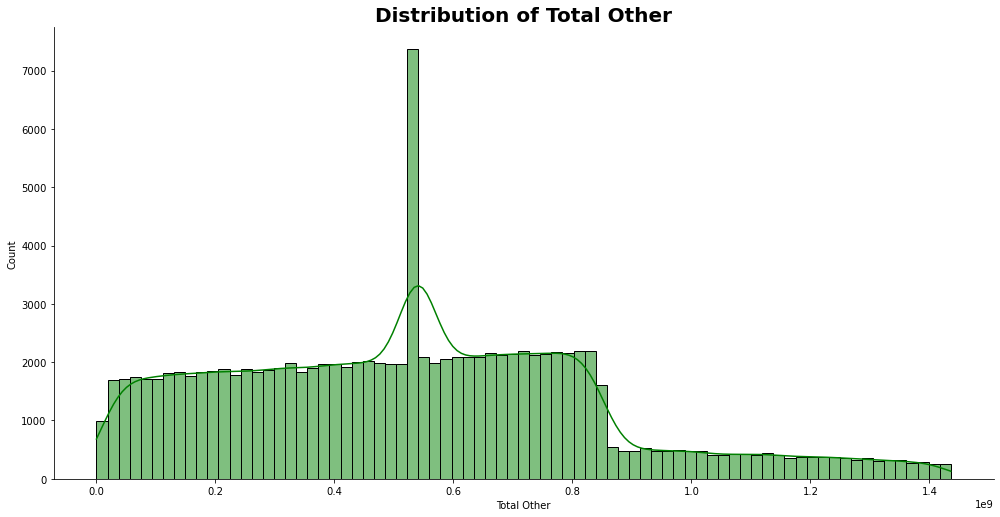

In [31]:
plot_hist(user_behaviour, 'Total Other','green')

### Bivariant analysis

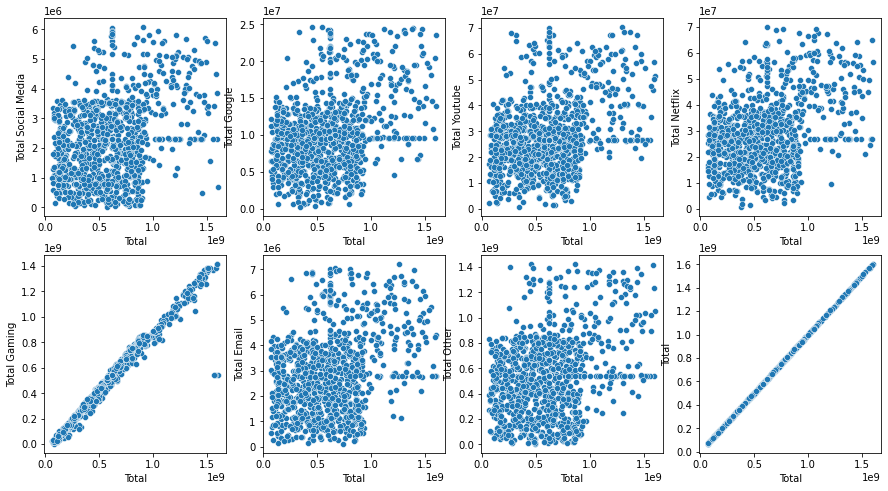

In [32]:
### Scatter Plot

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4,figsize=(15,8))
# plot_scatter(user_behaviour.sample(1000), "Total", "Total Social Media", "Total Vs Social Media",ax1, "", "")

def bivariant_sactter(df, x_col, y_col, ax):
    sns.scatterplot(data = df, x=x_col, y=y_col, ax=ax)

sample_df = user_behaviour.sample(1000)

bivariant_sactter(sample_df, 'Total', 'Total Social Media', ax1)
bivariant_sactter(sample_df, 'Total', 'Total Google', ax2)
bivariant_sactter(sample_df, 'Total', 'Total Youtube', ax3)
bivariant_sactter(sample_df, 'Total', 'Total Netflix', ax4)
bivariant_sactter(sample_df, 'Total', 'Total Gaming', ax5)
bivariant_sactter(sample_df, 'Total', 'Total Email', ax6)
bivariant_sactter(sample_df, 'Total', 'Total Other', ax7)
bivariant_sactter(sample_df, 'Total', 'Total', ax8)


#### Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 


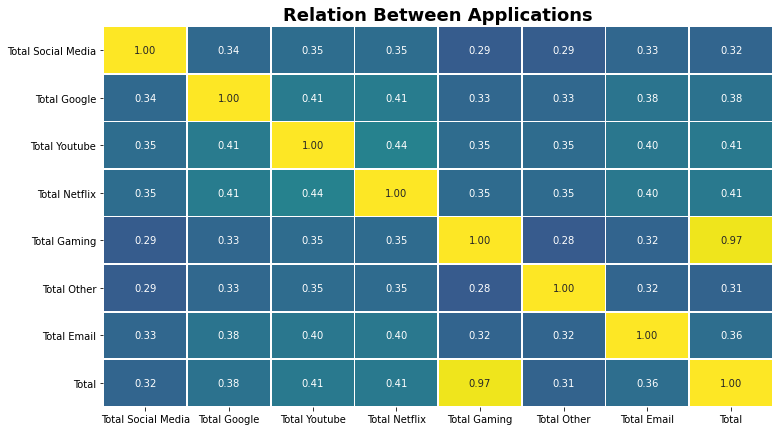

In [33]:

columns=['Total Socil Media', 'Total Google', 'Total Netflix', \
                             'Total Gaming', 'Total Other', 'Total Email']
correlation = user_behaviour.corr()
plot_heatmap(correlation, "Relation Between Applications")


#### Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 

In [34]:
### columns i need , Du , Total, Mi/Number
new_df = df_clean.copy()
new_df['Total'] = new_df['Total UL (Bytes)'] + new_df['Total DL (Bytes)']

working_df = new_df[['MSISDN/Number','Dur. (ms)','Total']].groupby('MSISDN/Number')\
    .agg({'Dur. (ms)':'sum', 'Total':'sum'}).reset_index()
working_df['classes'] = pd.qcut(working_df['Dur. (ms)'], 5, labels = False)

result = working_df.groupby('classes').agg({'Total':'sum'})
result

,Total
classes,
0,"11,529,809,163,943.00"
1,"12,953,477,655,713.00"
2,"10,850,256,429,370.00"
3,"13,574,682,434,513.00"
4,"24,718,584,629,821.00"


#### Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 

In [35]:
"""
***** user_behaviour.reset_index().copy() ***

dont forget to use this when you wan to make copy of the user_behaviour
reseting index will add 'MSISDN/Number' to the column list

"""
pca_new_df = user_behaviour.copy()


pca = PCA(n_components=4) 
df_pca = pca.fit_transform(pca_new_df)

principal_df = pd.DataFrame(data=df_pca, columns=['feat-1', 'feat-2', 'feat-3', 'feat-4'])
principal_df.head()

,feat-1,feat-2,feat-3,feat-4
0,"315,471,479.45","-263,072,863.40","-19,565,520.00","-6,747,923.45"
1,"-663,692,565.78","-32,192,751.54","-10,002,479.62","-9,956,996.89"
2,"-18,064,779.31","-24,665,129.45","-18,247,077.37","-9,287,728.34"
3,"-387,066,371.49","-390,284,028.34","-19,363,231.09","-20,107,657.55"
4,"1,176,833,352.11","-119,670,858.65","3,834,415.47","4,945,695.75"


In [36]:

# print(user_behaviour.loc[:,:].values)
scalle_df = user_behaviour.copy()


scalled = StandardScaler().fit_transform(scalle_df)
new_scalled_df = pd.DataFrame(data=scalled, columns=scalle_df.columns)

pca = PCA(n_components=4) 
df_pca = pca.fit_transform(new_scalled_df)

principal_df = pd.DataFrame(data=df_pca, columns=['feat-1', 'feat-2', 'feat-3', 'feat-4'])
principal_df.head()


,feat-1,feat-2,feat-3,feat-4
0,-0.34,-1.71,0.22,-0.60
1,-2.27,0.81,0.75,-0.40
2,-0.56,-0.30,0.44,-0.96
3,-2.69,-0.99,0.22,0.94
4,4.08,-1.54,-0.27,0.29


In [37]:
## ? What is the interpretation ? 


## Task 2

#### engagement matrices 
1. sessions frequency 
2. the duration of the session 
3. the sessions total traffi


#### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [38]:
df_task2 = df_clean.copy()
df_task2['Total'] = df_task2['Total UL (Bytes)'] + df_task2['Total DL (Bytes)']
df_task2 = df_task2.groupby('MSISDN/Number')\
    .agg({"Bearer Id": "count", 'Dur. (ms)':'sum', 'Total':'sum'})

df_task2.head()

,Bearer Id,Dur. (ms),Total
MSISDN/Number,,,
"33,601,001,722.00",1,"116,720.00","878,690,574.00"
"33,601,001,754.00",1,"181,230.00","156,859,643.00"
"33,601,002,511.00",1,"134,969.00","595,966,483.00"
"33,601,007,832.00",1,"49,878.00","422,320,698.00"
"33,601,008,617.00",2,"37,104.00","1,457,410,944.00"


In [39]:
### Top 10 Beaerer id
df_task2.sort_values(by='Bearer Id', ascending=False).head(10)

,Bearer Id,Dur. (ms),Total
MSISDN/Number,,,
"33,626,320,676.00",18,"1,785,419.00","7,971,167,261.00"
"33,614,892,860.00",17,"1,678,397.00","8,846,226,494.00"
"33,625,779,332.00",17,"1,599,052.00","8,499,620,722.00"
"33,659,725,664.00",16,"1,905,478.00","7,705,862,783.00"
"33,760,536,639.00",15,"1,651,084.00","8,514,773,963.00"
"33,675,877,202.00",15,"1,745,131.00","7,891,110,608.00"
"33,667,163,239.00",13,"1,209,703.00","5,618,394,054.00"
"33,604,515,716.00",12,"1,193,033.00","5,487,855,293.00"
"33,760,413,819.00",12,"1,248,477.00","7,132,370,514.00"


In [40]:
### Top 10 Duration
df_task2.sort_values(by='Dur. (ms)', ascending=False).head(10)

,Bearer Id,Dur. (ms),Total
MSISDN/Number,,,
"33,659,725,664.00",16,"1,905,478.00","7,705,862,783.00"
"33,626,320,676.00",18,"1,785,419.00","7,971,167,261.00"
"33,659,359,429.00",11,"1,747,994.00","4,658,437,137.00"
"33,675,877,202.00",15,"1,745,131.00","7,891,110,608.00"
"33,614,892,860.00",17,"1,678,397.00","8,846,226,494.00"
"33,760,536,639.00",15,"1,651,084.00","8,514,773,963.00"
"33,625,779,332.00",17,"1,599,052.00","8,499,620,722.00"
"33,786,323,068.00",12,"1,427,807.00","5,622,231,529.00"
"33,664,712,899.00",11,"1,334,982.00","6,872,018,208.00"


In [41]:
df_task2.sort_values(by='Total', ascending=False).head(10)

,Bearer Id,Dur. (ms),Total
MSISDN/Number,,,
"33,614,892,860.00",17,"1,678,397.00","8,846,226,494.00"
"33,760,536,639.00",15,"1,651,084.00","8,514,773,963.00"
"33,625,779,332.00",17,"1,599,052.00","8,499,620,722.00"
"33,626,320,676.00",18,"1,785,419.00","7,971,167,261.00"
"33,675,877,202.00",15,"1,745,131.00","7,891,110,608.00"
"33,659,725,664.00",16,"1,905,478.00","7,705,862,783.00"
"33,666,464,084.00",11,"1,168,703.00","7,308,500,938.00"
"33,760,413,819.00",12,"1,248,477.00","7,132,370,514.00"
"33,664,712,899.00",11,"1,334,982.00","6,872,018,208.00"


#### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement

In [42]:
min_max_scaler = preprocessing.MinMaxScaler()
df_values = df_task2.values

scalled_values = min_max_scaler.fit_transform(df_values)
df_normalized = pd.DataFrame(data=scalled_values, columns=df_task2.columns)


kmeans = KMeans(n_clusters=3).fit(df_normalized)


In [43]:
print(kmeans.cluster_centers_)

[[0.06741515 0.10033892 0.12202017]
 [0.00251132 0.0453915  0.05287222]
 [0.18790547 0.22643453 0.24433046]]


#### Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings



In [44]:
cluster = kmeans.predict(df_normalized)
cluster_df = df_task2.copy()
cluster_df['cluster']  = cluster


In [45]:
cluster_group_df = cluster_df.groupby('cluster')
cluster_0 = cluster_group_df.get_group(0)
cluster_1 = cluster_group_df.get_group(1)
cluster_2 = cluster_group_df.get_group(2)

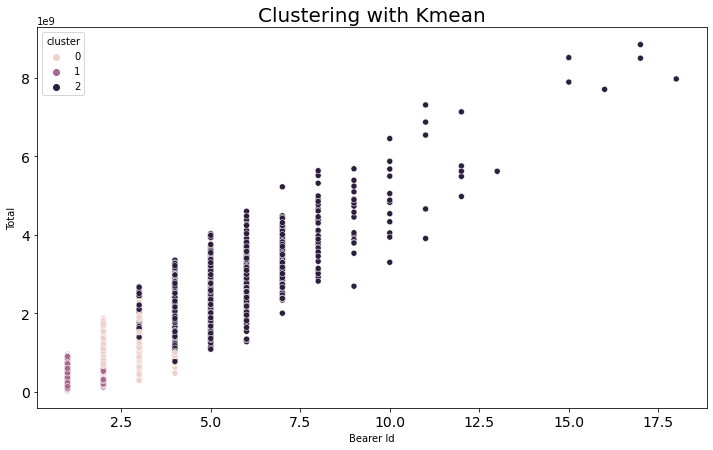

In [46]:
# Cluster 0
plot_scatter(cluster_df, "Bearer Id", "Total","Clustering with Kmean", "cluster", "")

In [47]:
# cluster 0
cluster_0.describe()

,Bearer Id,Dur. (ms),Total,cluster
count,"21,657.00","21,657.00","21,657.00","21,657.00"
mean,2.15,"197,529.18","1,108,152,475.30",0.00
std,0.41,"84,186.99","337,356,858.22",0.00
min,1.00,"18,235.00","167,774,602.00",0.00
25%,2.00,"145,255.00","873,946,703.00",0.00
50%,2.00,"186,785.00","1,091,011,719.00",0.00
75%,2.00,"259,197.00","1,343,208,449.00",0.00
max,4.00,"514,316.00","2,509,056,852.00",0.00


In [48]:
# cluster 1
cluster_1.describe()

,Bearer Id,Dur. (ms),Total,cluster
count,"80,490.00","80,490.00","80,490.00","80,490.00"
mean,1.04,"93,300.56","499,162,896.94",1.00
std,0.20,"50,926.66","242,565,312.09",0.00
min,1.00,"7,142.00","33,249,009.00",1.00
25%,1.00,"54,158.00","292,019,368.25",1.00
50%,1.00,"86,399.00","501,219,671.00",1.00
75%,1.00,"127,670.75","706,786,173.25",1.00
max,2.00,"261,421.00","1,047,729,901.00",1.00


In [49]:
# cluster 2
cluster_2.describe()

,Bearer Id,Dur. (ms),Total,cluster
count,"4,324.00","4,324.00","4,324.00","4,324.00"
mean,4.19,"436,793.56","2,185,460,356.30",2.00
std,1.22,"154,628.04","702,669,336.22",0.00
min,3.00,"85,554.00","661,851,764.00",2.00
25%,3.00,"345,597.00","1,735,694,858.00",2.00
50%,4.00,"420,869.00","2,082,001,496.00",2.00
75%,5.00,"482,661.75","2,511,949,031.50",2.00
max,18.00,"1,905,478.00","8,846,226,494.00",2.00


#### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [50]:
# total trafic, Application, user -> top to users
engagement = user_behaviour.reset_index().copy()

# Social Media engagement
engagement[['MSISDN/Number','Total Social Media']].sort_values(by='Total Social Media',ascending=False).head(5)

,MSISDN/Number,Total Social Media
51453,"33,663,181,151.00","6,081,804.00"
32957,"33,658,867,382.00","6,081,604.00"
56324,"33,664,508,797.00","6,081,388.00"
61411,"33,666,009,537.00","6,081,379.00"
48236,"33,662,414,853.00","6,081,303.00"


In [51]:
# Google Engagement
engagement[['MSISDN/Number','Total Google']].sort_values(by='Total Google',ascending=False).head(5)

,MSISDN/Number,Total Google
41965,"33,660,914,582.00","24,775,247.00"
35241,"33,659,348,553.00","24,775,169.00"
38690,"33,660,146,485.00","24,772,983.00"
72255,"33,669,599,728.00","24,770,765.00"
32720,"33,658,817,649.00","24,770,000.00"


In [52]:
engagement[['MSISDN/Number','Total Gaming']].sort_values(by='Total Gaming',ascending=False).head(5)

,MSISDN/Number,Total Gaming
66706,"33,667,751,293.00","1,433,029,038.00"
98046,"33,762,707,090.00","1,432,997,310.00"
50261,"33,662,875,027.00","1,432,967,016.00"
66122,"33,667,582,793.00","1,432,961,716.00"
36201,"33,659,565,929.00","1,432,706,980.00"


#### Plot the top 3 most used applications using appropriate charts.  


In [53]:
data = []

# Remove 'MSISDN/Number' and 'Total' from columns list
columns = user_behaviour.columns.tolist()[1:-1]

for column in columns:
    data.append(user_behaviour[column].sum())

data_df = pd.DataFrame({"Application": columns, "counts":data})

data_df.sort_values(by='counts', ascending=False)[:3]

,Application,counts
3,Total Gaming,"56,617,152,490,864.00"
4,Total Other,"56,460,438,934,470.00"
1,Total Youtube,"2,990,166,286,220.00"


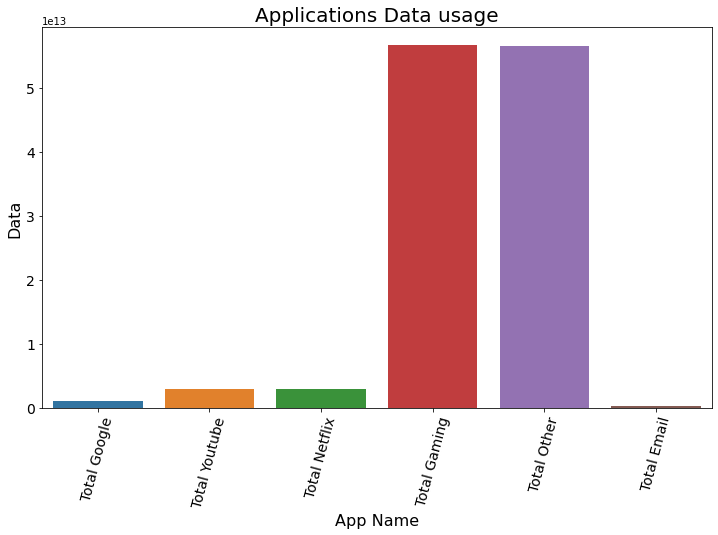

In [54]:
plot_bar(data_df,data_df['Application'], data_df['counts'], "Applications Data usage", "App Name", "Data")

Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
1. What is the optimized value of k (use elbow method for this)?  
2. Interpret your findings.


In [55]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_normalized)
    distortions.append(kmeanModel.inertia_)

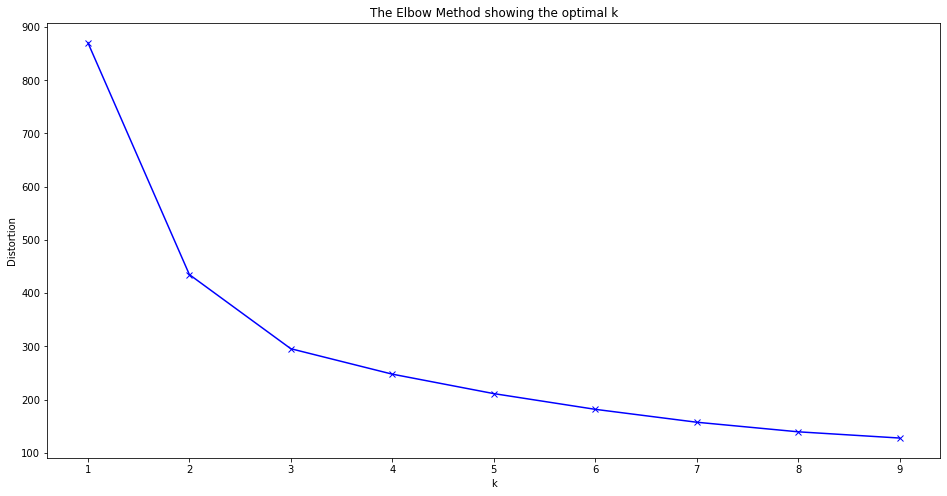

In [56]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [57]:
### so Number 3 is the optimum, and we should run with 3 cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)

cluster = kmeans.predict(df_normalized)
cluster_df = df_task2.copy()
cluster_df['cluster']  = cluster


## Task 3

Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
1. Average TCP retransmission
2. Average RTT
3. Handset type
4. Average throughput


In [58]:
'''
TCP DL Retrans. Vol (Bytes)
TCP UL Retrans. Vol (Bytes)

Avg RTT DL (ms)
Avg RTT UL (ms)

Handset type

Avg Bearer TP DL (kbps)
Avg Bearer TP UL (kbps)

'''
new_netwok_df = df[['MSISDN/Number','Bearer Id','Handset Type','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',\
                         'Avg RTT DL (ms)', 'Avg RTT UL (ms)',\
                         'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]


null_percentage(new_netwok_df)
new_netwok_df.isnull().sum()

Data Fraame contain null values of 18.56%


MSISDN/Number                      0
Bearer Id                          0
Handset Type                    8904
TCP DL Retrans. Vol (Bytes)    87764
TCP UL Retrans. Vol (Bytes)    96128
Avg RTT DL (ms)                27636
Avg RTT UL (ms)                27616
Avg Bearer TP DL (kbps)            0
Avg Bearer TP UL (kbps)            0
dtype: int64

In [59]:
## Fill Mising Values
for col in new_netwok_df.columns:
    if(new_netwok_df[col].isnull().sum()):
        new_netwok_df[col] = new_netwok_df[col].fillna(new_netwok_df[col].mode()[0])


In [60]:
null_percentage(new_netwok_df)
new_netwok_df.isnull().sum()

Data Fraame contain null values of 0.0%


MSISDN/Number                  0
Bearer Id                      0
Handset Type                   0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64

In [61]:
new_netwok_df['Total TCP Retrans'] = new_netwok_df['TCP DL Retrans. Vol (Bytes)'] +\
    new_netwok_df['TCP UL Retrans. Vol (Bytes)']
new_netwok_df['Total Throughput'] = new_netwok_df['Avg Bearer TP DL (kbps)'] +\
    new_netwok_df['Avg Bearer TP DL (kbps)']

new_netwok_df['Total RTT'] = new_netwok_df['Avg RTT DL (ms)'] + new_netwok_df['Avg RTT UL (ms)']

new_netwok_df.head()


,MSISDN/Number,Bearer Id,Handset Type,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total TCP Retrans,Total Throughput,Total RTT
0,"33,664,962,239.00","13,114,483,460,845,000,704.00",Samsung Galaxy A5 Sm-A520F,"1,330.00","1,330.00",42.00,5.00,23.00,44.00,"2,660.00",46.00,47.00
1,"33,681,854,413.00","13,114,483,482,879,000,576.00",Samsung Galaxy J5 (Sm-J530),"1,330.00","1,330.00",65.00,5.00,16.00,26.00,"2,660.00",32.00,70.00
2,"33,760,627,129.00","13,114,483,484,081,000,448.00",Samsung Galaxy A8 (2018),"1,330.00","1,330.00",28.00,5.00,6.00,9.00,"2,660.00",12.00,33.00
3,"33,750,343,200.00","13,114,483,485,443,000,320.00",Huawei B528S-23A,"1,330.00","1,330.00",28.00,5.00,44.00,44.00,"2,660.00",88.00,33.00
4,"33,699,795,932.00","13,114,483,499,480,999,936.00",Samsung Sm-G390F,"1,330.00","1,330.00",28.00,5.00,6.00,9.00,"2,660.00",12.00,33.00


In [62]:
aggregate = {'Total TCP Retrans':'sum', 'Total Throughput':'sum', 'Total RTT':'sum'}
columns = ['MSISDN/Number','Bearer Id','Handset Type', 'Total TCP Retrans', 'Total Throughput', 'Total RTT']
network_per_user_df = new_netwok_df[columns].groupby('MSISDN/Number').agg(aggregate).reset_index()
network_per_user_df.head()

,MSISDN/Number,Total TCP Retrans,Total Throughput,Total RTT
0,"33,601,001,722.00","2,660.00",74.00,46.00
1,"33,601,001,754.00","2,660.00",96.00,31.00
2,"33,601,002,511.00","2,660.00",96.00,33.00
3,"33,601,007,832.00","2,396.00",408.00,84.00
4,"33,601,008,617.00","9,373,492.00","80,790.00",119.00


Compute & list 10 of the top, bottom and most frequent:
1. TCP values in the dataset. 
2. RTT values in the dataset.
3. Throughput values in the dataset.


In [63]:
# top 5
network_per_user_df.sort_values(by='Total TCP Retrans', ascending=False)[:5]

,MSISDN/Number,Total TCP Retrans,Total Throughput,Total RTT
66616,"33,667,725,464.00","8,354,209,105.00","624,632.00",703.00
33988,"33,659,084,281.00","7,941,860,302.00","328,898.00",396.00
42210,"33,660,977,522.00","7,374,140,390.00","416,266.00",417.00
94334,"33,761,284,050.00","6,043,978,448.00","198,702.00",351.00
97859,"33,762,644,658.00","5,879,989,037.00","906,978.00","2,860.00"


In [64]:
# Bottom 5
network_per_user_df.sort_values(by='Total TCP Retrans', ascending=True)[:5]

,MSISDN/Number,Total TCP Retrans,Total Throughput,Total RTT
23369,"33,650,128,412.00",97.00,"60,460.00",48.00
6326,"33,614,777,138.00",128.00,"16,996.00",64.00
96625,"33,762,062,356.00",129.00,"63,080.00",41.00
13487,"33,626,357,513.00",134.00,"20,256.00",40.00
2162,"33,607,833,304.00",143.00,"32,484.00",32.00


In [66]:
# most frequent
network_per_user_df['Total TCP Retrans'].value_counts().head(5)

2,660.00     47444
5,320.00      7661
7,980.00      1107
2,624.00       363
10,640.00      293
Name: Total TCP Retrans, dtype: int64

Compute & report:
1. The distribution of the average throughput  per handset type and provide interpretation for your findings.
2. The average TCP retransmission view per handset type and provide 
